# Лабраторная работа №5. <b>Decision Tree Classification</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #если хотите использовать темы seaborn themes с matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv('Task2.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
# посмотрим на пропорции целевой переменной
pd.crosstab(df['Purchased'],df['Purchased'], normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


## Data preprocessing

In [7]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop('User ID',axis=1, inplace=True)

### Работа с категориальными переменными:
В DT моделях  не нужно переводить категориальные переменные в фиктивные переменные. Однако алгоритм также не может обрабатывать имена строк. Поэтому следует кодировать числом, например, <b>0</b> и <b>1</b> категориальные переменные.
<br>
<i>Примечание</i>:<br>
<b>Фиктивная переменная (Dummy variable)</b> — качественная переменная, принимающая значения 0 и 1, включаемая в эконометрическую модель для учёта влияния качественных признаков и событий на объясняемую переменную.

In [9]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
# альтернатива df['Gender'] = np.where(df['Gender']=='Male',1,0)

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [11]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [12]:
df = df[['Purchased','Age', 'EstimatedSalary', 'Gender']]

In [13]:
df.head()

,Purchased,Age,EstimatedSalary,Gender
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1


## Data visualization

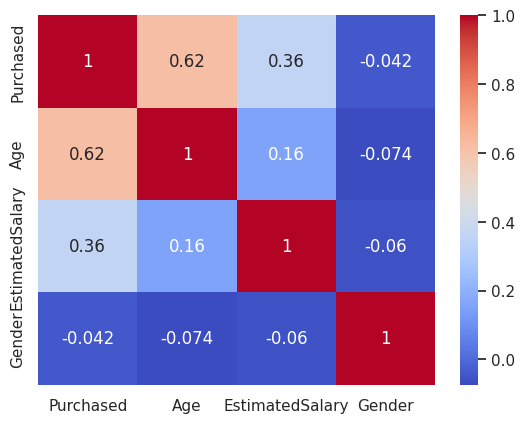

In [14]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

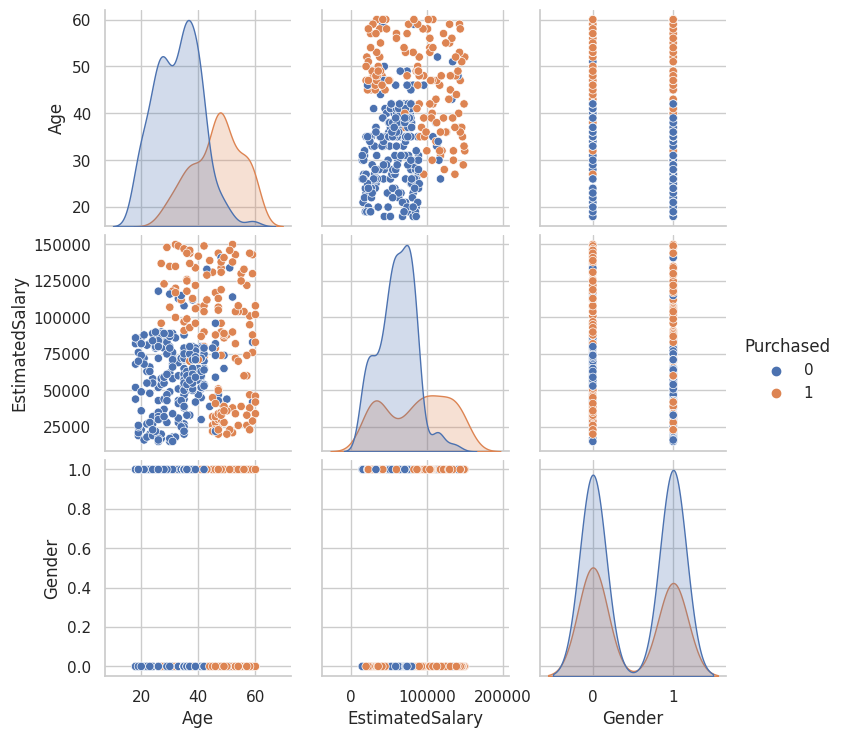

In [15]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'Purchased')
plt.show()

### Выбор признаков и разделение данных

In [16]:
y = df['Purchased']
X = df.drop('Purchased', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [17]:
X_train.head()

,Age,EstimatedSalary,Gender
269,40,61000,1
389,48,35000,0
232,40,107000,1
89,35,50000,1
236,40,57000,1


### Масштабирование признаков:


Для древовидных моделей нет необходимости масштабировать признаки! (Метрики расстояния не используются)

###  DTs Classification с Sklearn

In [18]:
from sklearn.tree import DecisionTreeClassifier

### Параметры Decision Tree

В следующей таблице перечислены ключевые параметры, доступные для этой цели в реализации DT в Sklearn. После введения наиболее важных параметров покажем, как использовать перекрестную проверку для оптимизации настроек гиперпараметра с учетом компромисса между смещением и дисперсией и снижения ошибок прогнозирования:

| Parameter                | Default | Options                                                                                                                                                               | Description                                                                                                                                                                                                             |
|--------------------------|---------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| criterion                | gini    | Regression: MSE, MAE Classification: Gini impurity, Cross Entropy                                                                                                     | Metric to evaluate split quality.                                                                                                                                                                                       |
| splitter                 | best    | best, random                                                                                                                                                          | How to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.                                                                            |
| max_depth                | None    | int                                                                                                                                                                   | Max # of levels in tree. Split nodes until max_depth is reached or all leaves are pure or all leaves contain less than min_samples_split samples.                                                                       |
| max_features             | None    | None: max_features=n_features; int; float (fraction): int(max_features * n_features)  auto, sqrt: max_features=sqrt(n_features). log2: max_features=log2(n_features). | # of features to consider when evaluating split                                                                                                                                                                         |
| max_leaf_nodes           | None    | None: unlimited # of leaf nodes int                                                                                                                                   | Continue to split nodes that reduce relative impurity the most until reaching max_leaf_nodes.                                                                                                                           |
| min_impurity_decrease    | 0       | float                                                                                                                                                                 | Split node if impurity decreases by at least this value.                                                                                                                                                                |
| min_samples_leaf         | 1       | int; float (as percentage of N)                                                                                                                                       | Minimum # of samples to be at a leaf node. A split will only be considered if there are at least min_samples_leaf training samples in each of the left and right branches. May smoothen the model, esp. for regression. |
| min_samples_split        | 2       | int; float (as percentage of N)                                                                                                                                       | The minimum number of samples required to split an internal node:                                                                                                                                                       |
| min_weight_fraction_leaf | 0       | NA                                                                                                                                                                    | The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided (in fit method).                       |
| class_weight             | None    | balanced: inversely proportional to class frequencies dict: {class_label: weight} list of dicts (for multi-output)                                                    | Weights associated with classes                                                                                                                                                                                         |

In [19]:
Tree_classifier = DecisionTreeClassifier()
Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
Tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [21]:
Tree_classifier.get_depth()

9

In [22]:
# Прогнозирование классов тестового набора
y_hat = Tree_classifier.predict(X_test)

----

## Метрики:

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [24]:
print(confusion_matrix(y_test, y_hat))

[[44  4]
 [12 20]]


#### Classification report

In [25]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        48
           1       0.83      0.62      0.71        32

    accuracy                           0.80        80
   macro avg       0.81      0.77      0.78        80
weighted avg       0.80      0.80      0.79        80



---

## Обрезка дерева с использованием метода обрезки по сложности затрат.
### Выбор $\alpha$ с помощью кросс-валидации.

In [26]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

* Функция **Cost_complexity_pruning_path** генерирует последовательность значений-кандидатов для альфа, исследуя путь сокращения от самого большого поддерева к самому маленькому поддереву.
* Затем функция вычисляет эффективное значение $\alpha$ для каждого поддерева как разницу в сложности стоимости между родительским поддеревом и текущим поддеревом, деленную на количество листьев, удаленных на этапе обрезки. Эффективное значение $\alpha$ для самого большого поддерева установлено равным нулю.
* Функция возвращает массив эффективных значений $\alpha$ для каждого поддерева на пути сокращения, который можно использовать для выбора оптимального значения $\alpha$ для сокращения дерева решений.

In [27]:
len(ccp_alphas)

20

In [28]:
path.keys()

dict_keys(['ccp_alphas', 'impurities'])

In [29]:
path

{'ccp_alphas': array([0.        , 0.0015625 , 0.0020202 , 0.00203488, 0.00208333,
        0.00243056, 0.0025    , 0.0025    , 0.00265625, 0.00273437,
        0.00277778, 0.00284091, 0.00318723, 0.00357143, 0.00381731,
        0.00511297, 0.00775811, 0.008125  , 0.12078047, 0.18094607]),
 'impurities': array([0.003125  , 0.0046875 , 0.01074811, 0.01685276, 0.02310276,
        0.03282498, 0.03782498, 0.04532498, 0.05063748, 0.05610623,
        0.06166179, 0.0673436 , 0.08327975, 0.09399404, 0.10162865,
        0.11185459, 0.13512893, 0.15137893, 0.27215939, 0.45310547])}

In [30]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [31]:
accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
    accuracy_cv.append(np.mean(accuracy))

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.875000
1,0.001562,0.871875
2,0.002020,0.868750
3,0.002035,0.859375
4,0.002083,0.868750


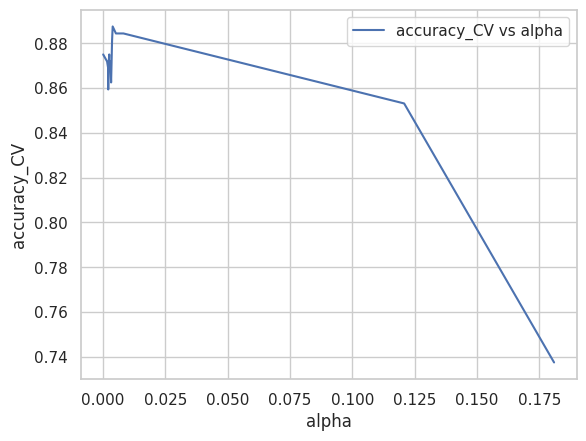

In [32]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

In [33]:
np.argmax(output['accuracy_CV'])

14

In [34]:
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.003817
accuracy_CV    0.887500
Name: 14, dtype: float64

Maximum accuracy = 89%.

In [35]:
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

0.003817307517745951

Установите классификатор DTs на оптимальную альфу

In [36]:
optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

Мы можем извлечь некоторые гиперпараметры модели оптимизации:

In [37]:
optimal_DT.get_params()

{'ccp_alpha': 0.003817307517745951,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
optimal_DT.get_depth()

4

In [39]:
optimal_DT.get_n_leaves()

10

#### **Confusion matrix**

In [40]:
print(confusion_matrix(y_test, y_hat_opt))

[[44  4]
 [ 8 24]]


#### **Classification report**

In [41]:
print(classification_report(y_test, y_hat_opt))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        48
           1       0.86      0.75      0.80        32

    accuracy                           0.85        80
   macro avg       0.85      0.83      0.84        80
weighted avg       0.85      0.85      0.85        80



###  **Cross validation**

Теперь давайте попробуем оценить точность нашей модели, используя технику перекрестной проверки.

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
# помните, что мы сохранили нашу модель в объекте под названием «Tree_classifier»
accuracy = cross_val_score(estimator = optimal_DT, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [44]:
accuracy

array([0.875   , 0.890625, 0.859375, 0.921875, 0.875   ])

In [45]:
round(accuracy.mean(),3)

0.884

## Визуализация Tree
4 различных способа визуализации дерева в Python: https://mljar.com/blog/visualize-decision-tree/

График DT с помощью метода **plot_tree** из sklearn.

Визуализируем одно простое дерево только с двумя признаками.


In [46]:
df.columns

Index(['Purchased', 'Age', 'EstimatedSalary', 'Gender'], dtype='object')

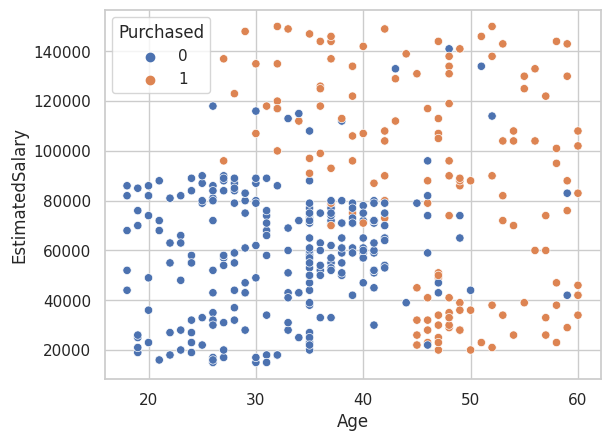

In [47]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')
plt.show()

In [48]:
dtree= DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

In [49]:
from sklearn.tree import plot_tree

In [50]:
X_train.shape

(320, 3)

In [51]:
X_train.head()

,Age,EstimatedSalary,Gender
269,40,61000,1
389,48,35000,0
232,40,107000,1
89,35,50000,1
236,40,57000,1


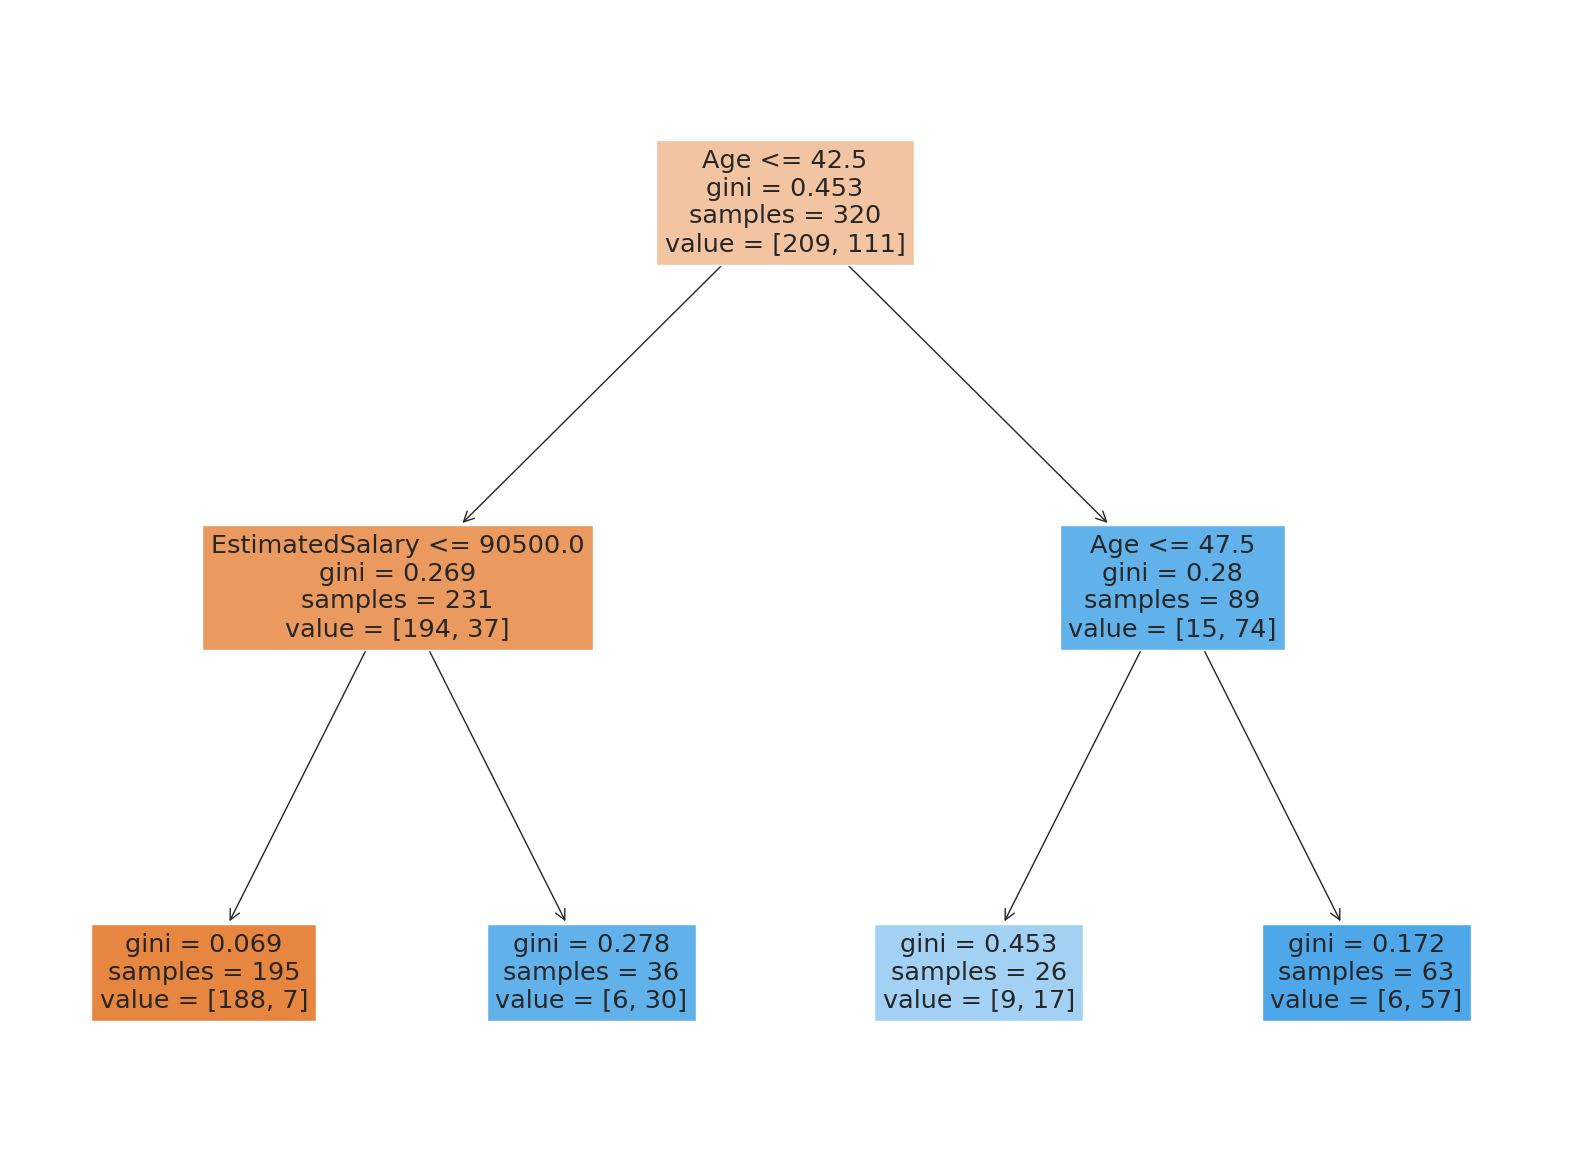

In [52]:
fig = plt.figure(figsize=(20,15))
DT_plot = plot_tree(dtree, feature_names=X_train.columns, filled=True)
# left branch True

In [53]:
fig.savefig("DT_plot_classification.png")

---
### Предварительная визуализация

Визуализация результатов обучающего набора (в 2D!). Придется заново запустить всю модель с двумя объясняющими переменными.

In [54]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [55]:
# Масштабирование функций: масштабировать функции необходимо только для целей визуализации.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Decision Tree classifier

In [56]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train.values.reshape(-1,))
y_hat_vis = dtree.predict(X_test)

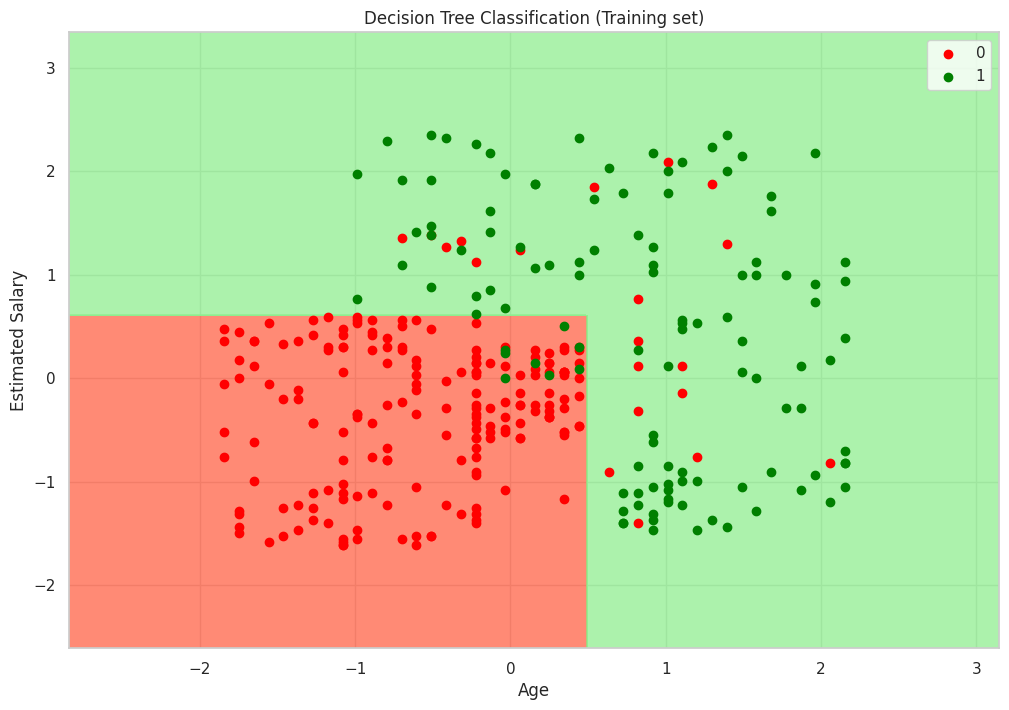

In [57]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Визуализация результатов тестового набора

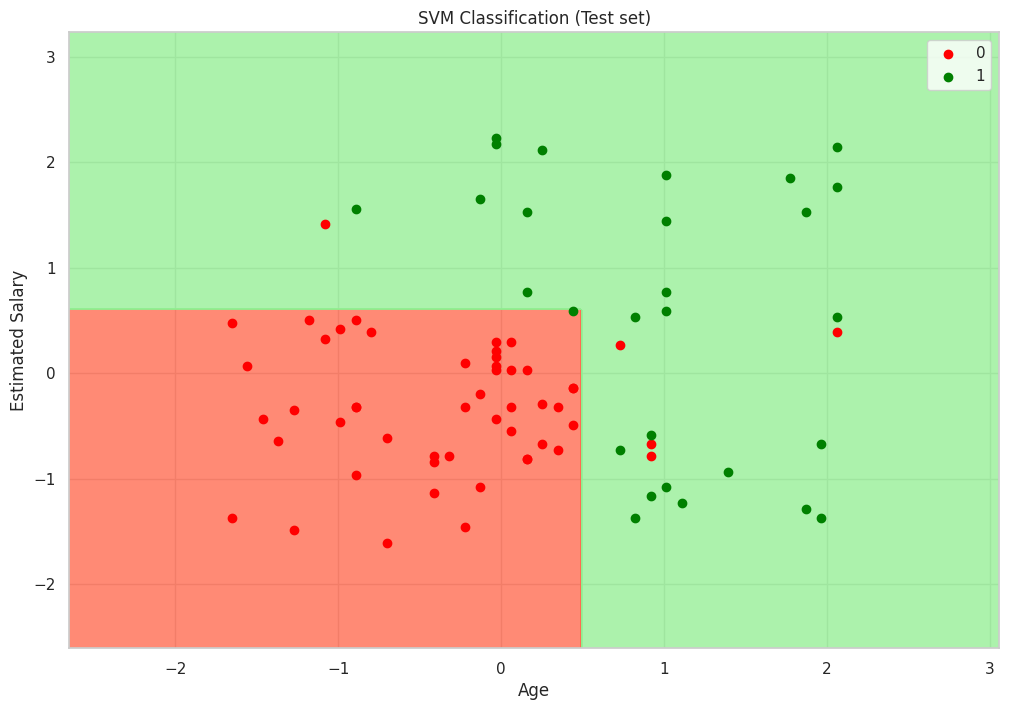

In [58]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [59]:
print(confusion_matrix(y_test, y_hat_vis))

[[47  5]
 [ 1 27]]


Дополнительно!---
---
# PyCaret  (открытая low-code библиотека ML на Python)

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [60]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 100.0

In [61]:
from pycaret.utils import version
version()

'3.1.0'

In [63]:
df_py = pd.read_csv('Task2.csv')

In [64]:
df_py.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [65]:
from pycaret.classification import *


In [66]:
setup(data=df_py,  target='Purchased',ignore_features=['User ID'] , session_id=555, train_size=0.7, preprocess=True, categorical_features= ['Gender'])


,Description,Value
0,Session id,555
1,Target,Purchased
2,Target type,Binary
3,Original data shape,"(400, 5)"
4,Transformed data shape,"(400, 4)"
5,Transformed train set shape,"(280, 4)"
6,Transformed test set shape,"(120, 4)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,2


In [67]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Create and tune model

In [68]:
dt = create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8929,0.8722,0.8000,0.8889,0.8421,0.7614,0.7638
1,0.8571,0.8444,0.8000,0.8000,0.8000,0.6889,0.6889
2,0.9286,0.9444,1.0000,0.8333,0.9091,0.8511,0.8607
3,0.8929,0.8722,0.8000,0.8889,0.8421,0.7614,0.7638
4,0.8929,0.8944,0.9000,0.8182,0.8571,0.7717,0.7740
5,0.9643,0.9722,1.0000,0.9091,0.9524,0.9239,0.9266
6,0.8214,0.8167,0.8000,0.7273,0.7619,0.6196,0.6214
7,0.8214,0.8167,0.8000,0.7273,0.7619,0.6196,0.6214
8,0.7857,0.7667,0.7000,0.7000,0.7000,0.5333,0.5333


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [69]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9639,0.9000,0.9000,0.9000,0.8444,0.8444
1,0.8571,0.8444,0.7000,0.8750,0.7778,0.6744,0.6835
2,0.8929,0.9500,0.9000,0.8182,0.8571,0.7717,0.7740
3,0.9643,1.0000,1.0000,0.9091,0.9524,0.9239,0.9266
4,0.8929,0.9722,0.9000,0.8182,0.8571,0.7717,0.7740
5,0.8929,0.9722,1.0000,0.7692,0.8696,0.7812,0.8006
6,0.8929,0.8889,0.8000,0.8889,0.8421,0.7614,0.7638
7,0.7857,0.9000,0.7000,0.7000,0.7000,0.5333,0.5333
8,0.8571,0.8500,0.7000,0.8750,0.7778,0.6744,0.6835


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


###  Дополнительные ссылки:


1. Decision Trees с Sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Decision Trees visualization: https://mljar.com/blog/visualize-decision-tree/
